In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV,train_test_split

In [5]:
df = pd.read_csv("Boston.csv")

In [6]:
df.shape

(506, 15)

In [32]:
print(df.columns)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


In [71]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2,random_state=40)

In [72]:
sc = StandardScaler()

In [73]:
x_train = sc.fit_transform(x_train)

In [74]:
x_test = sc.transform(x_test)

In [75]:
reg  = Ridge()

In [76]:
par = {"alpha":[1,2,3,4,5,6,7,8,9,10]}

In [77]:
ridgecv = GridSearchCV(reg,par,scoring  = "neg_mean_squared_error" ,cv=5)
ridgecv.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [78]:
print(ridgecv.best_params_)

{'alpha': 10}


In [82]:
pred = ridgecv.predict(x_test)

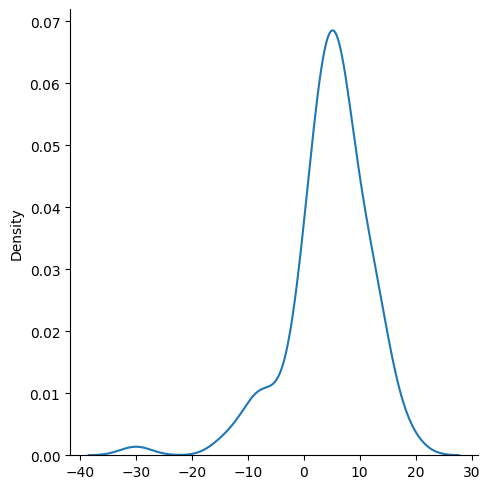

In [84]:
import seaborn as sns
sns.displot(pred-y_test,kind="kde")

In [85]:
from sklearn.metrics import r2_score

In [87]:
error_score = r2_score(pred,y_test)

In [88]:
print(error_score)

-0.700863174305115


In [89]:
# above implimented ridge regression for lasso ,
# replace everywhere lasso where ridge
